In [1]:
import os
import pandas as pd
from imageio import imread
import math
import numpy as np
import cv2
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential

data_dir = os.path.abspath('E:/Datset/GTSRB/GTSRB/Final_Training/Images')
os.path.exists(data_dir)

def resize_cv(im):
    return cv2.resize(im, (64, 64), interpolation = cv2.INTER_LINEAR)

list_images = []
output = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store' :
        continue
    
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = imread(img_path)
        img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
        img = resize_cv(img)
        list_images.append(img)
        output.append(row[1].ClassId)
print(list_images)
print(len(list_images))

Using TensorFlow backend.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# get test img
import glob as glob
# import os
# from imageio import imread
test_dir = os.path.abspath('C:/Users/Alive/Downloads/new/traffic-sign-detection-master/output')
os.path.exists(test_dir)

test_images = []
# PATH_TO_TEST_IMAGES = 'C:\\Users\\Alive\\Downloads\\new\\traffic-sign-detection-master\\test_images'
PATH_TO_TEST_IMAGES = glob.glob(os.path.join(test_dir, '*.ppm'))
for i in PATH_TO_TEST_IMAGES:
    img = imread(i)
    img = resize_cv(img)
    test_images.append(img)
test_images_stack = np.stack(test_images)
print(test_images_stack[:1])
# print("=============================")
# print(test_images)
print(len(test_images_stack))



[[[[108 109  94]
   [113 108  97]
   [120 107 101]
   ...
   [ 83  82  65]
   [ 87  84  67]
   [ 90  86  68]]

  [[104 104  89]
   [111 104  92]
   [121 104  96]
   ...
   [ 85  82  66]
   [ 87  84  67]
   [ 89  85  67]]

  [[ 98  95  79]
   [108  96  83]
   [123  99  89]
   ...
   [ 88  84  68]
   [ 87  83  67]
   [ 87  83  66]]

  ...

  [[101  70  67]
   [137  94  82]
   [187 126 103]
   ...
   [143  67  54]
   [140  74  56]
   [138  78  58]]

  [[122  78  84]
   [142  81  78]
   [171  85  67]
   ...
   [183 121 113]
   [168 113 102]
   [156 106  94]]

  [[133  82  94]
   [145  74  75]
   [162  61  48]
   ...
   [206 152 146]
   [183 134 128]
   [167 122 115]]]]
10


Train on 27446 samples, validate on 11763 samples
Epoch 1/3
27446/27446 [==============================] - 1227s 45ms/step - loss: 2.4306 - accuracy: 0.3545 - val_loss: 0.6274 - val_accuracy: 0.8232
Epoch 2/3
27446/27446 [==============================] - 1256s 46ms/step - loss: 0.6140 - accuracy: 0.8147 - val_loss: 0.1741 - val_accuracy: 0.9492
Epoch 3/3
27446/27446 [==============================] - 1256s 46ms/step - loss: 0.2575 - accuracy: 0.9248 - val_loss: 0.0897 - val_accuracy: 0.9742
[11 38 39  9  2  9 40 21 21  4]


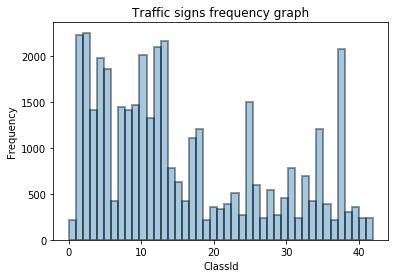

In [4]:

fig = sns.distplot(output, kde=False, bins = 43, hist = True, hist_kws=dict(edgecolor="black", linewidth=2))
fig.set(title = "Traffic signs frequency graph",
        xlabel = "ClassId",
        ylabel = "Frequency")

input_array = np.stack(list_images)
train_y = keras.utils.np_utils.to_categorical(output)

randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
x = input_array[randomize]
y = train_y[randomize]

split_size = int(x.shape[0]*0.7)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

# split_size = int(val_x.shape[0]*0.5)
# val_x, test_x = val_x[:split_size], val_x[split_size:]
# val_y, test_y = val_y[:split_size], val_y[split_size:]


#the model
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

epochs = 3
batch_size = 16
pool_size = (2, 2)
input_shape = Input(shape=(32, 32,3))

model = Sequential([

 Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

### Training the model
trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))                               

### Prdicting the class
pred = model.predict_classes(test_images_stack)
print(pred)
### Evaluating the model
# model.evaluate(test_x, test_y)